# LEVEL 2 : Task 1
**Task: Table Booking and Online Delivery**

Determine the percentage of restaurants that offer table booking and online delivery.

Compare the average ratings of restaurants with table booking and those without.

Analyze the availability of online delivery among restaurants with different price ranges.

In [1]:
# Import the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Load the dataset
df = pd.read_csv('/content/Dataset.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [17]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
Table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [18]:
# Determine the percentage of restaurants that offer table booking and online delivery.
Table_booking =df['Has Table booking'].value_counts(normalize=True)*100
Online_delivery = df['Has Online delivery'].value_counts(normalize=True)*100

print("Table Booking Percentage: ", Table_booking)
print("Online Delivery Percentage: ", Online_delivery)

Table Booking Percentage:  No     87.875615
Yes    12.124385
Name: Has Table booking, dtype: float64
Online Delivery Percentage:  No     74.337766
Yes    25.662234
Name: Has Online delivery, dtype: float64


In [20]:
# Compare the average ratings of restaurants with table booking and those without.
average_rating_with_tablebookings = df[df['Has Table booking']=='Yes']['Aggregate rating'].mean()
average_rating_without_tablebookings = df[df['Has Table booking']=='No']['Aggregate rating'].mean()
print('Average rating of restaurants with table bookings: ', average_rating_with_tablebookings)
print('Average rating of restaurants without table bookings: ', average_rating_without_tablebookings)

Average rating of restaurants with table bookings:  3.4419689119170984
Average rating of restaurants without table bookings:  2.559358989634219


In [31]:
df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack()*100

Has Online delivery,No,Yes
Price range,,
1,84.225923,15.774077
2,58.689367,41.310633
3,70.809659,29.190341
4,90.955631,9.044369


In [30]:
# Analyze the availability of online delivery among restaurants with different price ranges.
Online_delivery = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100
print('Online Delivery by Price ranges: \n', Online_delivery)

Online Delivery by Price ranges: 
 Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


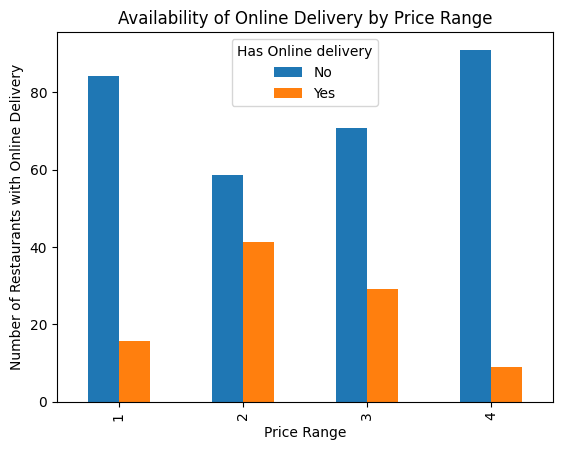

In [42]:
# Plotting the availability of online delivery by price ranges
Online_delivery.plot(kind='bar')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants with Online Delivery')
plt.title('Availability of Online Delivery by Price Range')
plt.show()

# Conclusion:

Analyzing the availability of online delivery among restaurants with different price ranges.
Availability is very less for online delivery by price ranges while comparing to without booking in online.